In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('netflix_vids.csv')

In [3]:
df

,Unnamed: 0,Video_ID,Views,Likes,Dislikes,Title
0,3170,ATf05n5LBHQ,45342777,574491,16482,Kaam 25: DIVINE
1,3360,7bfS6seiLhk,27039014,301078,12078,The Kissing Booth
2,1411,cSqi-8kAMmM,22832157,519757,74686,The Witcher
3,701,o2AsIXSh2xo,22807156,180406,7882,Bird Box
4,2188,R1ZXOOLMJ8s,22272235,380259,5800,Stranger Things 2
...,...,...,...,...,...,...
3861,2338,OhNR-VB5myo,246,4,0,CRIP CAMP: A DISABILITY REVOLUTION
3862,2134,RwFnfC5DK8s,195,5,0,Marriage Story
3863,2700,I_yn8U7MDgA,118,2,1,The Two Popes
3864,670,oXC8GPLkyyc,117,0,0,The Irishman


In [4]:
df.drop(df.columns[df.columns.str.contains('Unnamed')],axis=1, inplace = True) 
df

,Video_ID,Views,Likes,Dislikes,Title
0,ATf05n5LBHQ,45342777,574491,16482,Kaam 25: DIVINE
1,7bfS6seiLhk,27039014,301078,12078,The Kissing Booth
2,cSqi-8kAMmM,22832157,519757,74686,The Witcher
3,o2AsIXSh2xo,22807156,180406,7882,Bird Box
4,R1ZXOOLMJ8s,22272235,380259,5800,Stranger Things 2
...,...,...,...,...,...
3861,OhNR-VB5myo,246,4,0,CRIP CAMP: A DISABILITY REVOLUTION
3862,RwFnfC5DK8s,195,5,0,Marriage Story
3863,I_yn8U7MDgA,118,2,1,The Two Popes
3864,oXC8GPLkyyc,117,0,0,The Irishman


In [5]:
def search_movie(movie_name):
    return(df['Title'] == movie_name)

In [6]:
filt = search_movie('The Witcher')

In [7]:
desired_movie = df.loc[filt]

In [8]:
desired_movie

,Video_ID,Views,Likes,Dislikes,Title
2,cSqi-8kAMmM,22832157,519757,74686,The Witcher
226,8LiD3i9DS_c,3274049,111736,2027,The Witcher
414,AZDPuYeQQNM,1988603,50919,2833,The Witcher
724,KQPxD-GbF2c,997305,30982,515,The Witcher


In [9]:
filt1 = (desired_movie['Views'] == desired_movie['Views'].max())
desired_movie = desired_movie[filt1]
desired_movie

,Video_ID,Views,Likes,Dislikes,Title
2,cSqi-8kAMmM,22832157,519757,74686,The Witcher


In [10]:
desired_movie['Title']

2    The Witcher
Name: Title, dtype: object

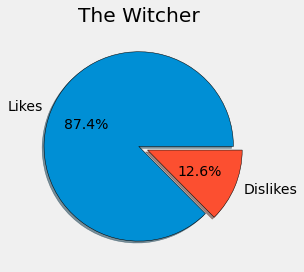

In [11]:
plt.style.use("fivethirtyeight")

a = int(desired_movie['Likes'])
b = int(desired_movie['Dislikes'])
# print(a,b)

slices = [a,b]
labels = ['Likes','Dislikes']

explode = [0,0.1]

plt.pie(slices, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})

c = desired_movie.get(['Title'])
d = str(c).split() [2:]
title = ' '.join(d)

plt.title(title)
plt.tight_layout()

plt.show()

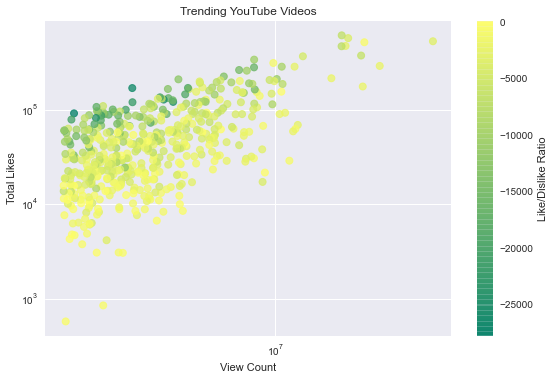

In [46]:
plt.style.use('seaborn')

data = pd.read_csv('netflix_vids.csv').head(500)
view_count = data['Views']
likes = data['Likes']
dislikes = data['Dislikes']
ratio = (100-((likes/dislikes)*100))



plt.scatter(view_count, likes, c=ratio ,cmap='summer',linewidth=1,alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()